In [78]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score

In [38]:
IMAGE_PATH = "UTKface_inthewild"

In [2]:
age_array = np.load("age_array.npy")
sex_array = np.load("sex_array.npy")
embedding_array = np.load("embedding_array.npy")
files_sublist = np.load("files_sublist.npy")
not_found = np.load("faces_not_found.npy")

In [20]:
sex_array = sex_array.astype("uint8")

In [8]:
np.shape(embedding_array)

(14613, 28, 28)

In [9]:
np.shape(embedding_array.reshape((embedding_array.shape[0], embedding_array.shape[1] * embedding_array.shape[2])))

(14613, 784)

Классификация по полу

In [21]:
values, counts = np.unique(sex_array, return_counts=True)
for v,c in zip(values, counts):
    print(v, c)

0 7629
1 6983
3 1


In [22]:
np.where(sex_array==3)

(array([12769], dtype=int64),)

In [25]:
data_x = embedding_array.reshape((embedding_array.shape[0], embedding_array.shape[1] * embedding_array.shape[2]))

In [26]:
bad_index = np.where(sex_array==3)
print("bad_index = ", bad_index[0])
data_y = np.delete(sex_array, bad_index[0])
data_x = np.delete(data_x, bad_index[0],axis = 0)
print(np.shape(data_x), np.shape(data_y))

bad_index =  [12769]
(14612, 784) (14612,)


In [27]:
indexes = np.arange(14612)

In [28]:
X_train, X_test, y_train, y_test, ind_train, ind_test  = train_test_split(data_x, data_y, indexes, test_size=0.2, random_state=42)

In [29]:
clf = RandomForestClassifier(n_estimators = 200, max_depth = 10, random_state=0)
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
target_names = ['man', 'woman']
print(classification_report(y_test, pred_y, target_names=target_names))

              precision    recall  f1-score   support

         man       0.76      0.83      0.79      1474
       woman       0.81      0.73      0.77      1449

    accuracy                           0.78      2923
   macro avg       0.78      0.78      0.78      2923
weighted avg       0.78      0.78      0.78      2923



In [32]:
print(np.shape(embedding_array), np.shape(files_sublist), np.shape(not_found))

(14613, 28, 28) (15000,) (387,)


Удаляем из списка файлов те файлы, в которых детектор не обнаружил лица, чтобы корректно визуализировать результат

In [36]:
for val in not_found:
    ind = np.where(files_sublist == val)
    files_sublist = np.delete(files_sublist, ind[0])
print(np.shape(files_sublist))

(14613,)


Визуализация результата

True label:  woman  Predicted label:  man


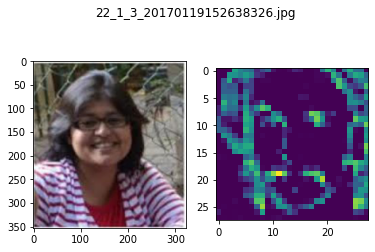

True label:  woman  Predicted label:  woman


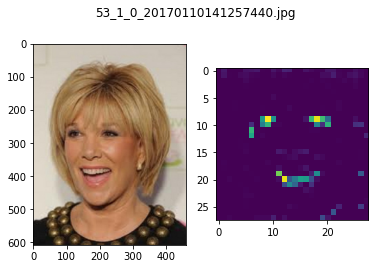

True label:  woman  Predicted label:  woman


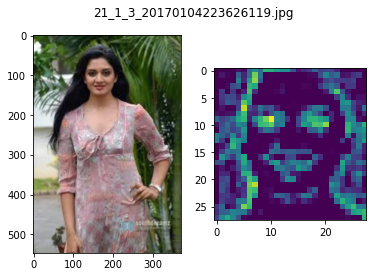

True label:  man  Predicted label:  man


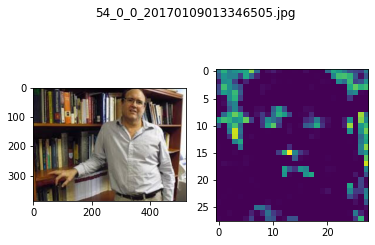

True label:  man  Predicted label:  man


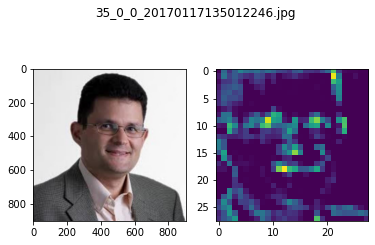

True label:  man  Predicted label:  man


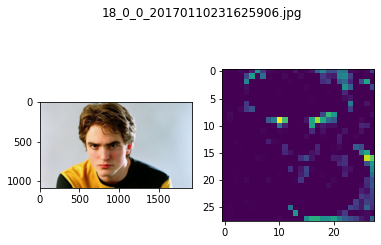

True label:  man  Predicted label:  man


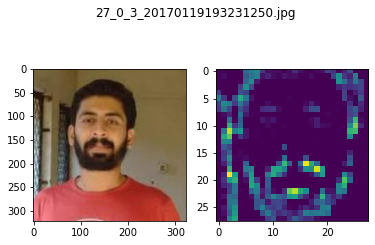

True label:  man  Predicted label:  man


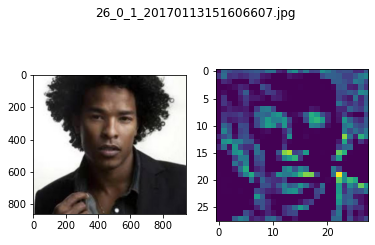

True label:  woman  Predicted label:  man


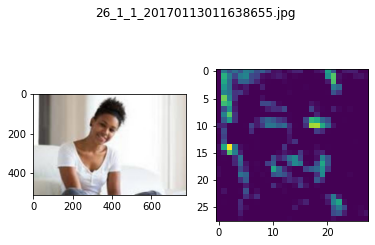

True label:  woman  Predicted label:  man


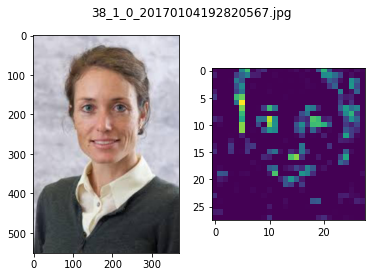

In [41]:
for i in range(10):
    ind = ind_test[i]
    print("True label: ", "man" if sex_array[ind] == 0 else "woman", " Predicted label: ", "man" if pred_y[i] == 0 else "woman")
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(files_sublist[ind])
    img = plt.imread(os.path.join(IMAGE_PATH,files_sublist[ind]))
    ax1.imshow(img)
    ax2.imshow(np.reshape(X_test[i], (28, 28)))
    plt.show()    

Предсказание возраста - задача регрессии.

In [30]:
values, counts = np.unique(age_array, return_counts=True)
for v,c in zip(values, counts):
    print(v, c)

1 670
10 105
100 6
101 1
105 3
11 34
110 5
111 1
12 78
13 43
14 93
15 117
16 138
17 99
18 149
19 59
2 302
20 173
21 215
22 242
23 263
24 519
25 458
26 1423
27 385
28 557
29 363
3 184
30 429
31 207
32 402
33 94
34 266
35 556
36 294
37 200
38 201
39 168
4 178
40 324
41 77
42 154
43 101
44 66
45 269
46 93
47 110
48 109
49 99
5 116
50 206
51 88
52 145
53 138
54 220
55 164
56 150
57 55
58 169
59 38
6 78
60 175
61 99
62 84
63 65
64 27
65 162
66 47
67 50
68 57
69 37
7 76
70 88
71 13
72 67
73 40
74 18
75 93
76 36
77 19
78 35
79 15
8 167
80 81
81 13
82 24
83 12
84 15
85 96
86 23
87 5
88 21
89 19
9 105
90 46
91 2
92 8
93 4
95 5
96 12
99 3


У нас мало примеров для людей старше 90 лет, поэтому будем решать задачу регрессии для людей до 90 лет.

In [51]:
age_array = age_array.astype("uint8")
print(np.shape(age_array))

(14613,)


Удалим сэмпл с полом = 3 и сэмплы с возрастом 90 лет и старше

In [83]:
data_x = embedding_array.reshape((embedding_array.shape[0], embedding_array.shape[1] * embedding_array.shape[2]))
data_x = np.delete(data_x, bad_index[0],axis = 0)
data_y = np.delete(age_array, bad_index[0])

print("data_y: ", data_y)
bad_indices = np.where(data_y >= 90)
print("Count of 90 before delete: ", len(bad_indices[0]))
for val in sorted(bad_indices[0], reverse = True):
    data_y = np.delete(data_y, val)
    data_x = np.delete(data_x, val, axis = 0)
#check
print("Count of 90 after delete: ", len(np.where(data_y >= 90)[0]))
print(np.shape(data_x), np.shape(data_y))

data_y:  [25  1 61 ... 28  4 24]
Count of 90 before delete:  96
Count of 90 after delete:  0
(14516, 784) (14516,)


In [74]:
indexes = np.arange(14516)

In [75]:
X_train, X_test, y_train, y_test, ind_train, ind_test  = train_test_split(data_x, data_y, indexes, test_size=0.2, random_state=42)

In [77]:
clf = RandomForestRegressor(n_estimators = 200, max_depth = 10, random_state=0)
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
print("R2 = ", r2_score(y_test, pred_y))

NameError: name 'r2_score' is not defined

In [80]:
print("R2 = ", r2_score(y_test, pred_y))

R2 =  0.414827069622429


Как и ожидалось, качество невысокое. Визуализируем результат

In [84]:
files_sublist_for_age = files_sublist
for val in sorted(bad_indices[0], reverse = True):
    files_sublist_for_age = np.delete(files_sublist_for_age, val)
#check
print(np.shape(files_sublist_for_age), np.shape(files_sublist))

(14517,) (14613,)


True label:  2  Predicted label:  11.894791920605524


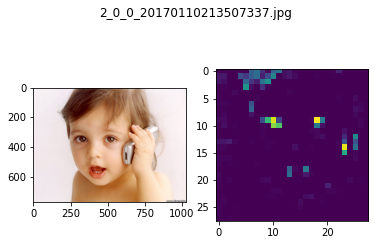

True label:  78  Predicted label:  41.22491012833737


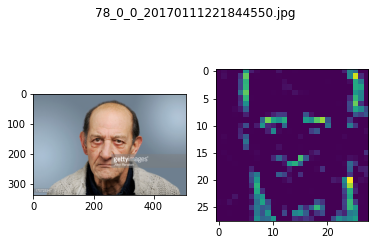

True label:  75  Predicted label:  42.05285585896683


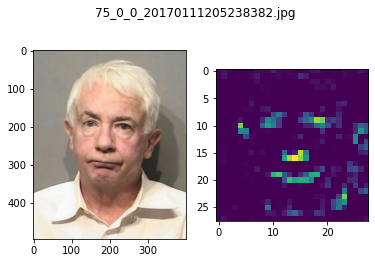

True label:  35  Predicted label:  36.35010279462336


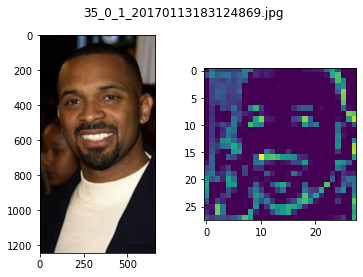

True label:  24  Predicted label:  26.552768064279594


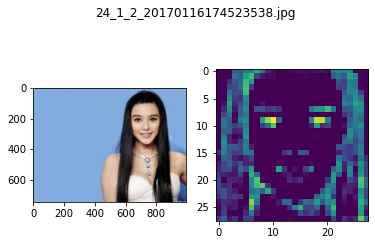

True label:  22  Predicted label:  25.425182611076035


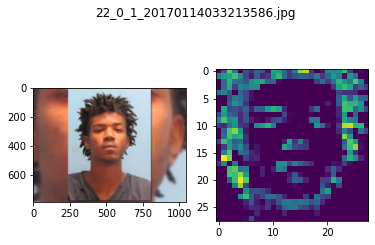

True label:  78  Predicted label:  45.269631162089865


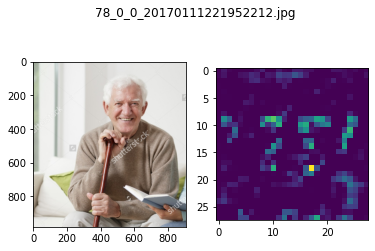

True label:  33  Predicted label:  40.312339302887665


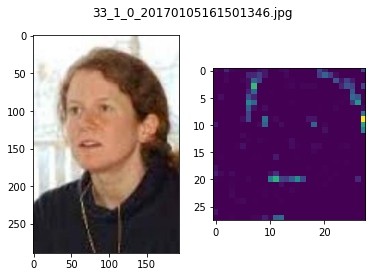

True label:  35  Predicted label:  39.83754138139844


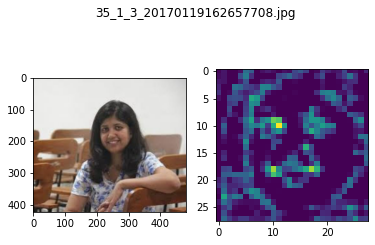

True label:  16  Predicted label:  31.441648857488065


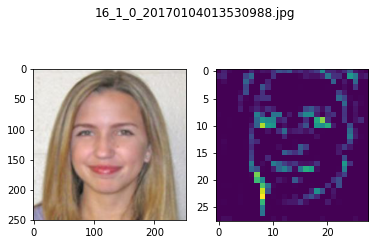

In [86]:
for i in range(10):
    ind = ind_test[i]
    print("True label: ", y_test[i], " Predicted label: ", pred_y[i])
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(files_sublist_for_age[ind])
    img = plt.imread(os.path.join(IMAGE_PATH,files_sublist_for_age[ind]))
    ax1.imshow(img)
    ax2.imshow(np.reshape(X_test[i], (28, 28)))
    plt.show()    

Возраст некоторых сэмплов угадывается достаточно близко, поэтому точность можно повысить, например, если выбрать в качестве ground truth брать интервалы возрастов.